In [1]:
import numpy as np
from croston import croston
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Sukuriam duomenis

y = np.array([10,0,20,1,5,2,0,0,0], dtype=int)
n_forecasts = len(y)
X = np.arange(len(y))


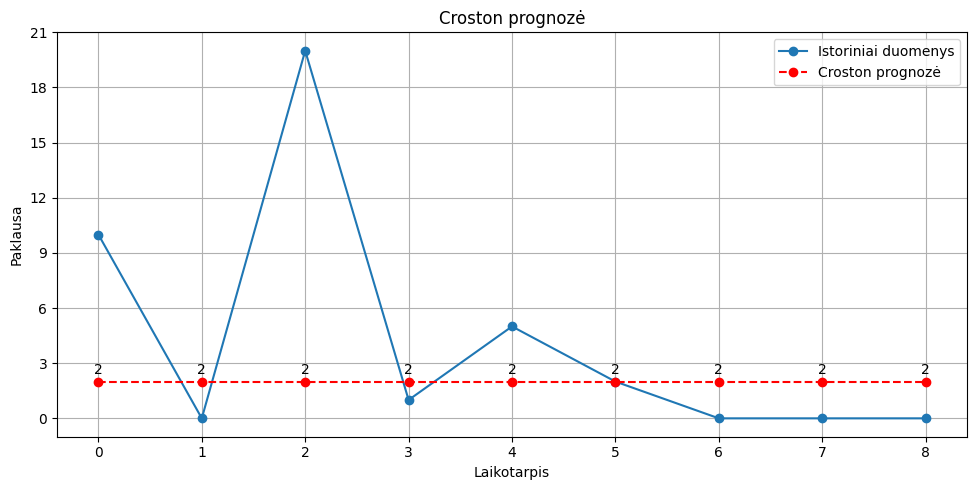

Croston prognozė: [1.9999998 1.9999998 1.9999998 1.9999998 1.9999998 1.9999998 1.9999998
 1.9999998 1.9999998]


In [2]:
#CROSTON prognozė
model = croston.fit_croston(y, 1, 'original')
forecast = np.repeat(model['croston_forecast'], n_forecasts)

# Pavaizduojame rezultatus
# Sukuriam x ašies reikšmes
x_past = np.arange(len(y)) # Laikotarpis

# Braižom
plt.figure(figsize=(10, 5))
plt.plot(x_past, y, label='Istoriniai duomenys', marker='o')
plt.plot(x_past, forecast, color='red', label='Croston prognozė', marker='o', linestyle='--')

# Reikšmės virš progozuojamos linijos
for x_, y_ in zip(x_past, forecast):
    plt.text(x_, y_ + 0.4, f'{y_:.0f}', ha='center', fontsize=10)
    
plt.title('Croston prognozė')
plt.xlabel('Laikotarpis')
plt.ylabel('Paklausa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # x ašis
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # y ašis
plt.show()

print("Croston prognozė:", forecast)

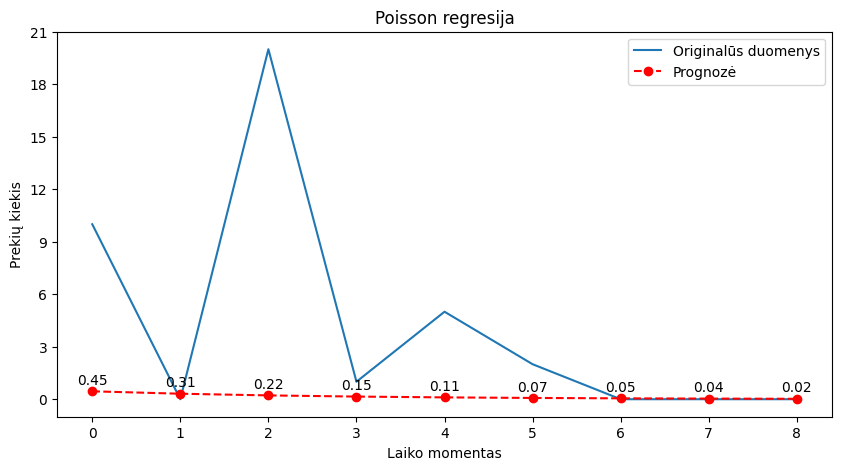

Poisson regresijos prognozė: [0.45281224 0.31442021 0.21832464 0.15159856 0.10526582 0.07309365
 0.0507542  0.0352423  0.02447127]


In [3]:
#POISON regresija

# Poisson regresija (GLM)
X = sm.add_constant(X)  # pridėti konstanta (bias)
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Prognozė
future_X = sm.add_constant(np.arange(len(y), len(y) + n_forecasts))

preds = results.predict(future_X)

# Atvaizduojame rezultatus
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y)), y, label='Originalūs duomenys')
plt.plot(np.arange(len(y)), preds, 'ro--', label='Prognozė')
plt.xlabel('Laiko momentas')
plt.ylabel('Prekių kiekis')
plt.legend()

for x_, y_ in zip(x_past, preds):
    plt.text(x_, y_ + 0.4, f'{y_:.2f}', ha='center', fontsize=10)
    
plt.title('Poisson regresija')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # x ašis
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # y ašis
plt.show()

print("Poisson regresijos prognozė:", preds)

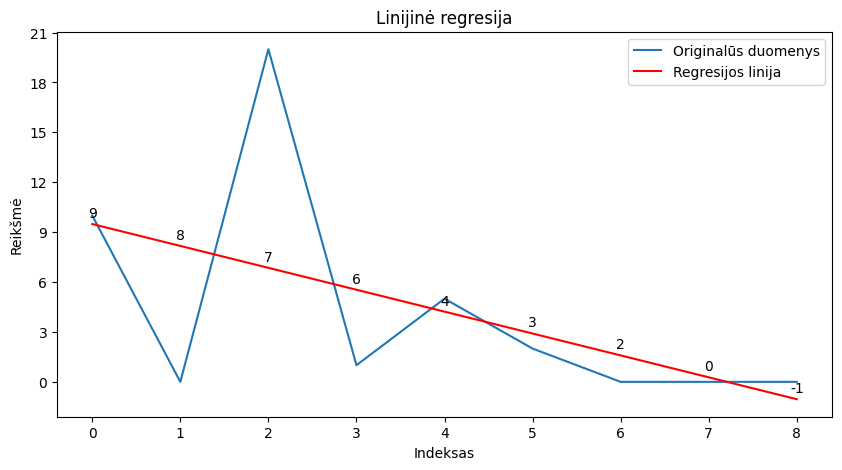

Linijinės regresijos prognozė [ 9.48888889  8.17222222  6.85555556  5.53888889  4.22222222  2.90555556
  1.58888889  0.27222222 -1.04444444]


In [4]:
# Linijinė regresija
# X = np.arange(len(y)).reshape(-1, 1)  # X reikšmės – tiesiog indeksai (0, 1, 2, ...)
X = np.arange(len(y)).reshape(-1, 1)

# Sukuriame ir išmokome modelį
model = LinearRegression()
model.fit(X, y)

# Nuspėjame reikšmes
y_pred = model.predict(X)

# Pavaizduojame rezultatus
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='Originalūs duomenys')
plt.plot(X, y_pred, color='red', label='Regresijos linija')
plt.xlabel('Indeksas')
plt.ylabel('Reikšmė')
plt.legend()

for x_, y_ in zip(x_past, y_pred):
    plt.text(x_, y_ + 0.4, f'{y_:.0f}', ha='center', fontsize=10)

plt.title('Linijinė regresija')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # x ašis
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # y ašis
plt.show()

print("Linijinės regresijos prognozė", y_pred)

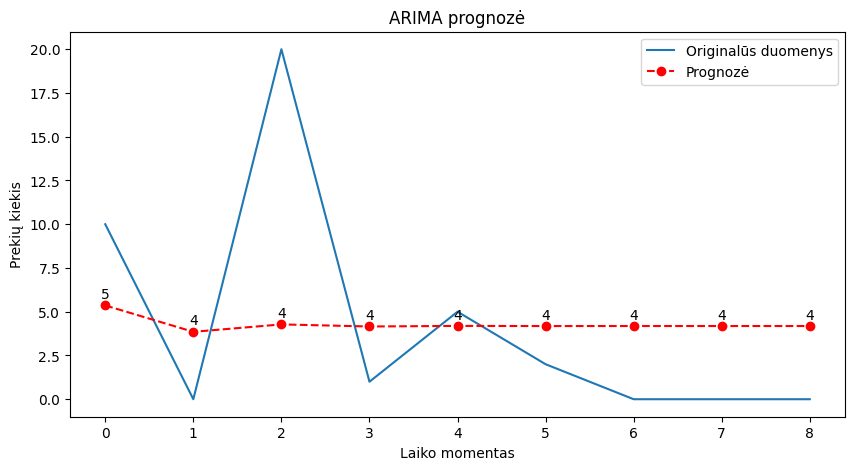

ARIMA prognozė:  [5.36004835 3.85059456 4.27567482 4.15596713 4.18967825 4.18018479
 4.18285826 4.18210538 4.1823174 ]


In [5]:
# Sukuriame ir apmokome ARIMA modelį
model = ARIMA(y, order=(1, 0, 0))  # AR(1) modelis
model_fit = model.fit()

# Prognozuojame ateinančias reikšmes
forecast = model_fit.forecast(steps=n_forecasts)

# Atvaizduojame rezultatus
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y)), y, label='Originalūs duomenys')
plt.plot(np.arange(len(y)), forecast, 'ro--', label='Prognozė')
plt.xlabel('Laiko momentas')
plt.ylabel('Prekių kiekis')
plt.legend()

for x_, y_ in zip(x_past, forecast):
    plt.text(x_, y_ + 0.4, f'{y_:.0f}', ha='center', fontsize=10)

plt.title('ARIMA prognozė')
plt.show()

print("ARIMA prognozė: ", forecast)